In [16]:
import pandas as pd
import numpy as np

In [17]:
file = 'titanic.csv'
df_4 = pd.read_csv(file, index_col='PassengerId')
df_4 = df_4.dropna()
df_4 = df_4[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df_4['Sex'] = df_4['Sex'].map({'female':0, 'male':1})
df_4.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
2,1,1,0,38.0,1,0,71.2833
4,1,1,0,35.0,1,0,53.1000
7,0,1,1,54.0,0,0,51.8625


In [ ]:
#WYODRĘBNIENIE X, y oraz klasy

In [18]:
df_4['class'] = df_4['Survived'].astype('category').cat.codes
df_4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,class
PassengerId,,,,,,,,
2,1,1,0,38.0,1,0,71.2833,1
4,1,1,0,35.0,1,0,53.1000,1
7,0,1,1,54.0,0,0,51.8625,0
11,1,3,0,4.0,1,1,16.7000,1
12,1,1,0,58.0,0,0,26.5500,1
...,...,...,...,...,...,...,...,...
872,1,1,0,47.0,1,1,52.5542,1
873,0,1,1,33.0,0,0,5.0000,0
880,1,1,0,56.0,0,1,83.1583,1


In [19]:
classes = df_4.pop('Survived').unique()
classes

array([1, 0], dtype=int64)

In [20]:
df_4

,Pclass,Sex,Age,SibSp,Parch,Fare,class
PassengerId,,,,,,,
2,1,0,38.0,1,0,71.2833,1
4,1,0,35.0,1,0,53.1000,1
7,1,1,54.0,0,0,51.8625,0
11,3,0,4.0,1,1,16.7000,1
12,1,0,58.0,0,0,26.5500,1
...,...,...,...,...,...,...,...
872,1,0,47.0,1,1,52.5542,1
873,1,1,33.0,0,0,5.0000,0
880,1,0,56.0,0,1,83.1583,1


In [21]:
y = df_4.pop('class')

In [22]:
X = df_4

In [ ]:
#PODZIAŁ NA ZBIORY TRENINGOWY, TESTOWY i TRENOWANIE MODELU

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [25]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [26]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [157]:
#MACIERZ POMYŁEK

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[27, 18],
       [15, 77]], dtype=int64)

In [30]:
y_pred_train.sum()

95

In [31]:
y_train.sum()

92

In [32]:
import seaborn as sns

<AxesSubplot:>

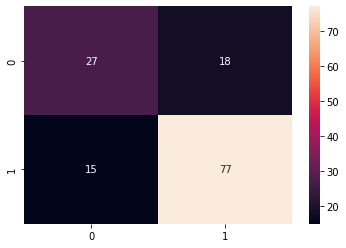

In [33]:
sns.heatmap(cm_train,annot=True, fmt='d')

In [166]:
#METRYKI

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

In [37]:
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

In [39]:
#SKALOWANIE MODELU I PORÓWNANIE WYNIKÓW PO SKALOWANIU

In [40]:
from sklearn import preprocessing

In [41]:
scaled = preprocessing.StandardScaler().fit(X_train)

In [42]:
X_train_scaled = scaled.transform(X_train)
X_test_scaled = scaled.transform(X_test)
model2 = LogisticRegression(random_state=42, max_iter=200)
model2.fit(X_train_scaled, y_train)
y_pred_train_s = model2.predict(X_train_scaled)
y_pred_s = model2.predict(X_test_scaled)
cm_train_scaled = confusion_matrix(y_train, y_pred_train_s)

<AxesSubplot:>

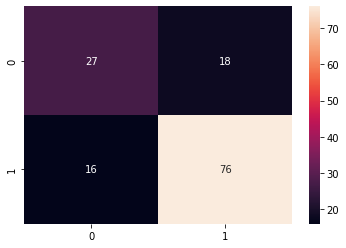

In [43]:
sns.heatmap(cm_train_scaled, annot=True, fmt='d')

<AxesSubplot:>

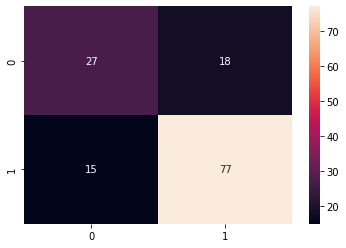

In [44]:
sns.heatmap(cm_train, annot=True, fmt='d')